In [20]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.llms import OpenAI 

In [40]:
#setup the api key 
os.environ['OPENAI_API_KEY']="*********"

In [22]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [23]:
# Importing the data
df = pd.read_csv('http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data')

In [24]:
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [41]:
# Initializing the agent 
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True) 
openai = OpenAI(temperature=0.0) 
openai.model_name

'gpt-3.5-turbo-instruct'

### Querying the Agent

In [28]:
agent("What is the shape of the dataset?")



> Entering new AgentExecutor chain...
Thought: I need to use a tool to get the shape of the dataset.
Action: python_repl_ast
Action Input: df.shape
Observation: (462, 11)
Thought: I now know the final answer
Final Answer: The shape of the dataset is (462, 11).

> Finished chain.


{'input': 'What is the shape of the dataset?',
 'output': 'The shape of the dataset is (462, 11).'}

In [29]:
agent("How many missing values are there in each column?")



> Entering new AgentExecutor chain...
Thought: I need to find a way to count the number of missing values in each column.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Thought: I now know the final answer
Final Answer: There are no missing values in any column.

> Finished chain.


{'input': 'How many missing values are there in each column?',
 'output': 'There are no missing values in any column.'}



> Entering new AgentExecutor chain...
Thought: I need to group the dataframe by chd and then plot a bar graph.
Action: python_repl_ast
Action Input: df.groupby('chd').size().plot(kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A bar graph showing the distribution of people suffering with chd.

> Finished chain.


{'input': 'Show the distribution of people suffering with chd using bar graph.',
 'output': 'A bar graph showing the distribution of people suffering with chd.'}

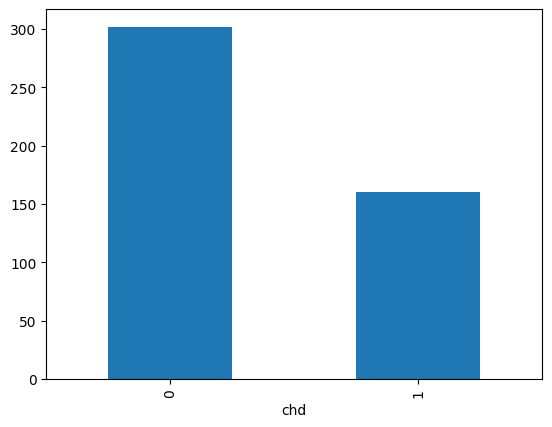

In [33]:
agent("Show the distribution of people suffering with chd using bar graph.")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include rows where chd is equal to 1, then create a histogram with the specified age ranges.
Action: python_repl_ast
Action Input: df[df['chd'] == 1]['age'].hist(bins=[0,10,20,30,40,50,60,70,80,90,100])
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A histogram showing the distribution of age for individuals with chd, with bins of 0-10, 10-20, 20-30, etc.

> Finished chain.


{'input': 'Show the distribution of age where the person is \n        suffering with chd using histogram with \n        0 to 10, 10 to 20, 20 to 30 years and so on.',
 'output': 'A histogram showing the distribution of age for individuals with chd, with bins of 0-10, 10-20, 20-30, etc.'}

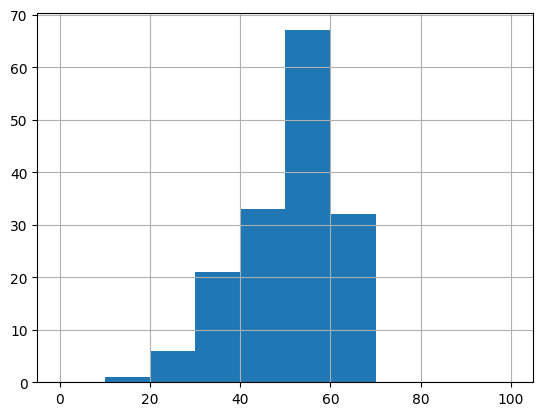

In [34]:
agent("""Show the distribution of age where the person is 
        suffering with chd using histogram with 
        0 to 10, 10 to 20, 20 to 30 years and so on.""")